# Get Data

In [1]:
inst = 1
field = 'SWIRE'
quad = 'A'
datadir='../../doc/20170617_Stacking/maps/PanSTARRScats/'

df_origin = pd.read_csv(datadir + 'SWIRE_'+quad+'.csv',low_memory=False)

In [2]:
print(list(df_origin))

['ra', 'dec', 'x', 'y', 'yminMag', 'ymin_col', 'gMeanPSFMag', 'rMeanPSFMag', 'iMeanPSFMag', 'zMeanPSFMag', 'yMeanPSFMag', 'gMeanKronMag', 'rMeanKronMag', 'iMeanKronMag', 'zMeanKronMag', 'yMeanKronMag', 'gMeanApMag', 'rMeanApMag', 'iMeanApMag', 'zMeanApMag', 'yMeanApMag', 'qualityFlag', 'objInfoFlag']


In [3]:
df_all = df_origin[['ra', 'dec', 'x', 'y',\
                'gMeanPSFMag', 'rMeanPSFMag', 'iMeanPSFMag', 'zMeanPSFMag', 'yMeanPSFMag', \
                'gMeanKronMag', 'rMeanKronMag', 'iMeanKronMag', 'zMeanKronMag', 'yMeanKronMag',\
                'gMeanApMag', 'rMeanApMag', 'iMeanApMag', 'zMeanApMag', 'yMeanApMag', 'qualityFlag']].copy()

In [4]:
df_all.head()

,ra,dec,x,y,gMeanPSFMag,rMeanPSFMag,iMeanPSFMag,zMeanPSFMag,yMeanPSFMag,gMeanKronMag,rMeanKronMag,iMeanKronMag,zMeanKronMag,yMeanKronMag,gMeanApMag,rMeanApMag,iMeanApMag,zMeanApMag,yMeanApMag,qualityFlag
0,241.093416,55.335304,210.617637,1015.955854,-999.00000,-999.00000,-999.0,-999.00000,6.49163,-999.0000,-999.0000,-999.0,-999.000,12.9557,-999.0000,-999.0000,-999.0,-999.0000,17.439899,32
1,242.573392,54.657916,570.523757,590.188120,8.84053,8.17406,-999.0,-999.00000,6.90106,12.3405,13.7802,-999.0,-999.000,10.4736,15.6011,15.3494,-999.0,-999.0000,13.094000,160
2,242.573199,54.658166,570.394628,590.243651,10.15500,-999.00000,-999.0,-999.00000,7.00679,12.5871,-999.0000,-999.0,-999.000,-999.0000,13.5589,-999.0000,-999.0,-999.0000,-999.000000,32
3,242.537149,54.359664,723.891114,602.907046,-999.00000,-999.00000,-999.0,-999.00000,7.08880,-999.0000,-999.0000,-999.0,-999.000,13.6783,-999.0000,-999.0000,-999.0,-999.0000,18.206600,32
4,244.272341,55.269016,255.160303,87.404797,10.75600,9.50143,-999.0,8.16382,7.53716,12.8689,12.3510,-999.0,11.075,10.1184,13.6847,13.8894,-999.0,14.5503,13.785300,32


## flag decomposition

In [5]:
flag_arr = df_all.qualityFlag
bin_values = np.flip(2 ** np.arange(11),0)
flag_bin_arr = np.zeros([len(flag_arr),len(bin_values)])

for i, flag in enumerate(flag_arr):
    bin_str = "{:011b}".format(flag)
    bin_int = list(map(int,list(bin_str)))
    flag_bin_arr[i,:] = bin_int
    
for i,bin_value in enumerate(bin_values):
    df_all['flag{}'.format(bin_value)] = flag_bin_arr[:,i].astype(int)

In [6]:
df_all.head()

,ra,dec,x,y,gMeanPSFMag,rMeanPSFMag,iMeanPSFMag,zMeanPSFMag,yMeanPSFMag,gMeanKronMag,...,flag512,flag256,flag128,flag64,flag32,flag16,flag8,flag4,flag2,flag1
0,241.093416,55.335304,210.617637,1015.955854,-999.00000,-999.00000,-999.0,-999.00000,6.49163,-999.0000,...,0,0,0,0,1,0,0,0,0,0
1,242.573392,54.657916,570.523757,590.188120,8.84053,8.17406,-999.0,-999.00000,6.90106,12.3405,...,0,0,1,0,1,0,0,0,0,0
2,242.573199,54.658166,570.394628,590.243651,10.15500,-999.00000,-999.0,-999.00000,7.00679,12.5871,...,0,0,0,0,1,0,0,0,0,0
3,242.537149,54.359664,723.891114,602.907046,-999.00000,-999.00000,-999.0,-999.00000,7.08880,-999.0000,...,0,0,0,0,1,0,0,0,0,0
4,244.272341,55.269016,255.160303,87.404797,10.75600,9.50143,-999.0,8.16382,7.53716,12.8689,...,0,0,0,0,1,0,0,0,0,0


## extract only flag 16 rows

In [7]:
df = df_all[(df_all.flag8 == 1) | (df_all.flag16 == 1) ].copy()

# Pan-STARRS - 2MASS cross match

In [8]:
# load 2MASS data

tmdir='../../doc/20170617_Stacking/maps/catcoord/TM'+str(inst)+'/'
tmdfname = list(pd.read_csv(tmdir+'PSC/'+field+'_'+quad+'_2m.txt',header=0,sep='|'))
tmdf = pd.read_csv(tmdir+'PSC/'+field+'_'+quad+'_2m.txt',header=0,sep=',',names=tmdfname)

In [9]:
# select samples in CIBER targeting quad

tmdf = tmdf[(tmdf.x > -0.5) & (tmdf.x < 511.5) & (tmdf.y > -0.5) & (tmdf.y < 511.5)].copy()
df = df[(df.x > -0.5) & (df.x < 511.5) & (df.y > -0.5) & (df.y < 511.5)].copy()

In [10]:
df = df.reset_index(drop=True)
df.head()

,ra,dec,x,y,gMeanPSFMag,rMeanPSFMag,iMeanPSFMag,zMeanPSFMag,yMeanPSFMag,gMeanKronMag,...,flag512,flag256,flag128,flag64,flag32,flag16,flag8,flag4,flag2,flag1
0,243.430510,55.657698,56.070832,335.302958,10.409,9.67,9.366,9.199,9.104,-999.0,...,0,0,1,0,1,0,1,0,0,0
1,243.617239,54.978434,406.707213,280.004144,10.458,9.68,9.395,9.253,9.149,-999.0,...,0,0,1,0,1,0,1,0,0,0
2,244.467465,55.395409,189.051777,30.739303,10.887,10.02,9.675,9.486,9.359,-999.0,...,0,0,1,0,1,0,1,0,0,0
3,244.002096,55.015998,386.589086,166.057352,12.286,10.88,10.201,9.758,9.505,-999.0,...,0,0,1,0,1,0,1,0,0,0
4,244.377702,55.148189,317.047094,55.459792,10.555,10.17,10.050,10.020,10.008,-999.0,...,0,0,1,0,1,0,1,0,0,0


In [11]:
tmdf = tmdf.drop(['idx'],axis=1)
tmdf = tmdf.reset_index(drop=True)
tmdf.head()

,ra,dec,x,y,mAB_I,mAB_H,mAB_j,mAB_h,mAB_k
0,242.822647,55.740780,12.298339,511.460305,15.718,15.439,15.618,15.417,15.502
1,242.826721,55.562172,104.705905,511.036652,17.252,16.870,17.144,16.928,16.718
2,242.827377,55.414936,180.814640,511.473815,15.755,15.751,15.730,15.673,16.012
3,242.830643,55.565525,102.982322,509.883068,17.802,16.831,17.433,16.879,16.701
4,242.835083,55.699028,33.937444,508.036115,17.926,17.487,17.827,17.628,17.161


## select the mag to be used in comparing with match mag

In [12]:
df['mag_use'] = df['yMeanPSFMag']
df['mag_band'] = ['y']*len(df)

idx=df.index[df['mag_use']==-999]
df.iloc[idx,np.where(np.array(list(df))=='mag_use')[0][0]] = df.iloc[idx]['zMeanPSFMag']
df.iloc[idx,np.where(np.array(list(df))=='mag_band')[0][0]] = 'z'

idx=df.index[df['mag_use']==-999]
df.iloc[idx,np.where(np.array(list(df))=='mag_use')[0][0]] = df.iloc[idx]['iMeanPSFMag']
df.iloc[idx,np.where(np.array(list(df))=='mag_band')[0][0]] = 'i'

idx=df.index[df['mag_use']==-999]
df.iloc[idx,np.where(np.array(list(df))=='mag_use')[0][0]] = df.iloc[idx]['rMeanPSFMag']
df.iloc[idx,np.where(np.array(list(df))=='mag_band')[0][0]] = 'r'

idx=df.index[df['mag_use']==-999]
df.iloc[idx,np.where(np.array(list(df))=='mag_use')[0][0]] = df.iloc[idx]['gMeanPSFMag']
df.iloc[idx,np.where(np.array(list(df))=='mag_band')[0][0]] = 'g'

idx=df.index[df['mag_use']==-999]
df.iloc[idx,np.where(np.array(list(df))=='mag_band')[0][0]] = 'non'

print('{} sources use y band.'.format(sum(df.mag_band=='y')))
print('{} sources use z band.'.format(sum(df.mag_band=='z')))
print('{} sources use i band.'.format(sum(df.mag_band=='i')))
print('{} sources use r band.'.format(sum(df.mag_band=='r')))
print('{} sources use g band.'.format(sum(df.mag_band=='g')))
print('{} sources has no mag in all bands.'.format(sum(df.mag_band=='non')))

10170 sources use y band.
6839 sources use z band.
7866 sources use i band.
964 sources use r band.
277 sources use g band.
7035 sources has no mag in all bands.


## do the match

In [13]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky

coordtm = SkyCoord(ra=tmdf['ra']*u.degree, dec=tmdf['dec']*u.degree, frame='icrs')
coordps = SkyCoord(ra=df['ra']*u.degree, dec=df['dec']*u.degree, frame='icrs')

# match PanSTARRS to 2MASS
idx_p2t, d2d_p2t,_ = match_coordinates_sky(coordps, coordtm)

# match 2MASS to PanSTARRS
idx_t2p, d2d_t2p,_ = match_coordinates_sky(coordtm, coordps)

In [14]:
df['tm_I'] = np.array(tmdf.iloc[idx_p2t].mAB_I)
df['dmatch_arcsec'] = d2d_p2t.arcsec

tmdf['ps_mag_use'] = np.array(df.iloc[idx_t2p].mag_use)
tmdf['ps_mag_band'] = np.array(df.iloc[idx_t2p].mag_band)
tmdf['dmatch_arcsec'] = d2d_t2p.arcsec

In [15]:
print('{} sources use y band.'.format(sum(tmdf.ps_mag_band=='y')))
print('{} sources use z band.'.format(sum(tmdf.ps_mag_band=='z')))
print('{} sources use i band.'.format(sum(tmdf.ps_mag_band=='i')))
print('{} sources use r band.'.format(sum(tmdf.ps_mag_band=='r')))
print('{} sources use g band.'.format(sum(tmdf.ps_mag_band=='g')))
print('{} sources has no mag in all bands.'.format(sum(tmdf.ps_mag_band=='non')))

2251 sources use y band.
11 sources use z band.
8 sources use i band.
2 sources use r band.
3 sources use g band.
5 sources has no mag in all bands.


# plot the hist of two catalogs

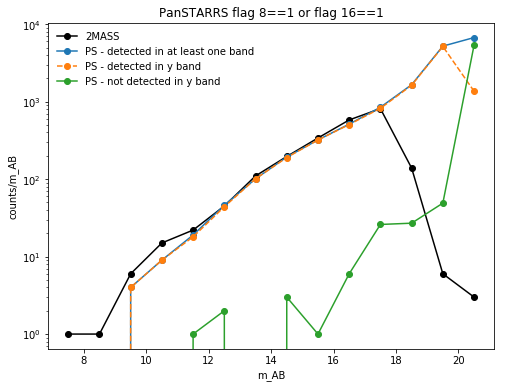

In [17]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

binedges = np.arange(7,22,1)
bins = (binedges[:-1] + binedges[1:])/2

tmhist,_ = np.histogram(tmdf['mAB_I'], bins = binedges)
ax.plot(bins,tmhist,'ko-',label='2MASS')

pshist,binedge = np.histogram(df['mag_use'], bins = binedges)
ax.plot(bins,pshist,'o-',label='PS - detected in at least one band')

pshist,binedge = np.histogram(df[df.mag_band == 'y']['mag_use'], bins = binedges)
ax.plot(bins,pshist,'o--',label='PS - detected in y band')

pshist,binedge = np.histogram(df[(df.mag_band != 'y') & (df.mag_band != 'non')]['mag_use'], bins = binedges)
ax.plot(bins,pshist,'o-',label='PS - not detected in y band')

ax.set_yscale('log')
ax.set_xlabel('m_AB')
ax.set_ylabel('counts/m_AB')
ax.set_title('PanSTARRS flag 8==1 or flag 16==1')
ax.legend(loc=0, frameon = False)
plt.savefig('flg816_hist.png',dpi=256,bbox_inches='tight')

# plot the bands relation

In [18]:
detection_arr = np.zeros([len(df),5])
detection_arr[:,0] = np.array(df.gMeanPSFMag!=-999).astype(int)
detection_arr[:,1] = np.array(df.rMeanPSFMag!=-999).astype(int)
detection_arr[:,2] = np.array(df.iMeanPSFMag!=-999).astype(int)
detection_arr[:,3] = np.array(df.zMeanPSFMag!=-999).astype(int)
detection_arr[:,4] = np.array(df.yMeanPSFMag!=-999).astype(int)

In [19]:
PSFmag_arr = np.array(df[['gMeanPSFMag','rMeanPSFMag','iMeanPSFMag','zMeanPSFMag','yMeanPSFMag']])
PSFmag_arr[np.where(PSFmag_arr==-999)] = float('nan')
stdmag_arr = np.nanstd(PSFmag_arr,axis=1)

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


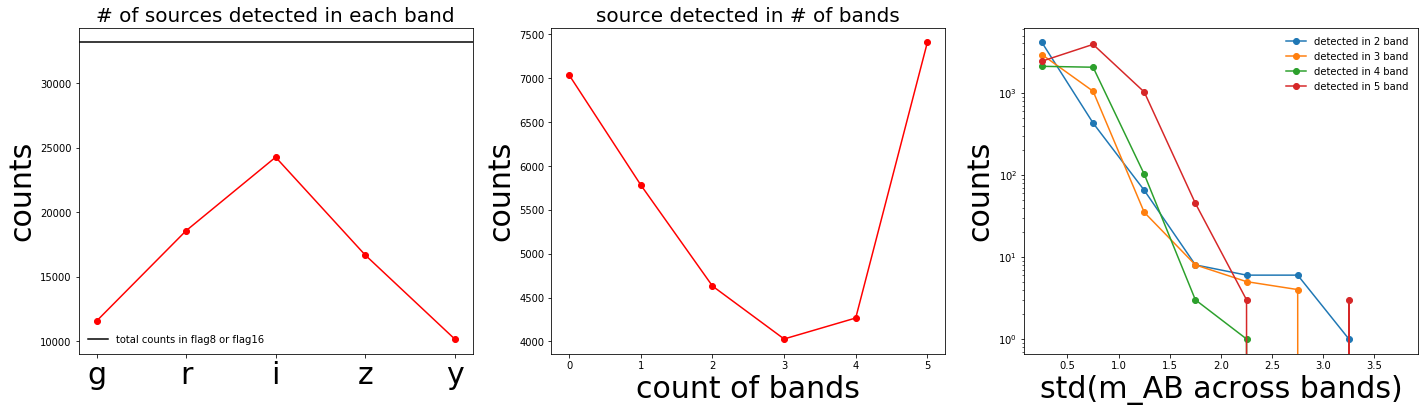

In [21]:
fig, ax = plt.subplots(1,3,figsize=(24,6))

ax[0].plot(np.sum(detection_arr,axis=0),'ro-')
ax[0].axhline(len(detection_arr),c='k',label='total counts in flag8 or flag16')
ax[0].set_xticks([0,1,2,3,4])
ax[0].set_xticklabels(['g','r','i','z','y'],fontsize=30)
ax[0].set_title('# of sources detected in each band',fontsize=20)
ax[0].set_ylabel('counts',fontsize=30)
ax[0].legend(loc=0,frameon=False)

hist,_ = np.histogram(np.sum(detection_arr,axis=1), bins=np.arange(-0.5,6.5,1))
ax[1].plot(np.arange(6),hist,'ro-')
ax[1].set_title('source detected in # of bands',fontsize=20)
ax[1].set_ylabel('counts',fontsize=30)
ax[1].set_xlabel('count of bands',fontsize=30)

binedges = np.arange(0,4.5,0.5)
bins = (binedges[:-1] + binedges[1:])/2

for i in [2,3,4,5]:
    hist,_ = np.histogram(stdmag_arr[np.sum(detection_arr,axis=1)==i], bins=binedges)
    ax[2].plot(bins,hist,'o-',label='detected in {} band'.format(i))
    ax[2].set_yscale('log')
    ax[2].set_ylabel('counts',fontsize=30)
    ax[2].set_xlabel('std(m_AB across bands)',fontsize=30)
    ax[2].legend(loc=0,frameon=False)

plt.savefig('flag816_detection.png',dpi=256,bbox_inches='tight')

# plot the magnitude correlation of match

## match PanSTARRS to 2MASS

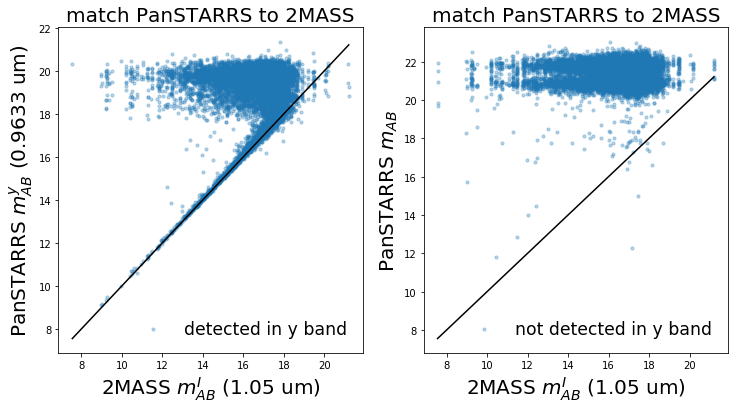

In [22]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
idx_y = np.arange(len(df))[df.mag_band == 'y']
idx_d = np.arange(len(df))[(df.mag_band != 'y') & (df.mag_band != 'non')]
ax[0].scatter(df.tm_I[idx_y],df.mag_use[idx_y],s=10,alpha=0.3,label='detected in y band')
ax[0].plot([min(df.tm_I),max(df.tm_I)],[min(df.tm_I),max(df.tm_I)],'k')
ax[0].set_title('match PanSTARRS to 2MASS',fontsize=20)
ax[0].set_xlabel(r'2MASS $m_{AB}^I$ (1.05 um)',fontsize=20)
ax[0].set_ylabel(r'PanSTARRS $m_{AB}^y$ (0.9633 um)',fontsize=20)
ax[0].legend(loc=0,frameon=False,fontsize='xx-large')

ax[1].scatter(df.tm_I[idx_d],df.mag_use[idx_d],s=10,alpha=0.3,label='not detected in y band')
ax[1].plot([min(df.tm_I),max(df.tm_I)],[min(df.tm_I),max(df.tm_I)],'k')
ax[1].set_title('match PanSTARRS to 2MASS',fontsize=20)
ax[1].set_xlabel(r'2MASS $m_{AB}^I$ (1.05 um)',fontsize=20)
ax[1].set_ylabel(r'PanSTARRS $m_{AB}$',fontsize=20)
ax[1].legend(loc=0,frameon=False,fontsize='xx-large')

plt.savefig('flag816_p2t.png',dpi=256,bbox_inches='tight')

## match 2MASS to PanSTARRS

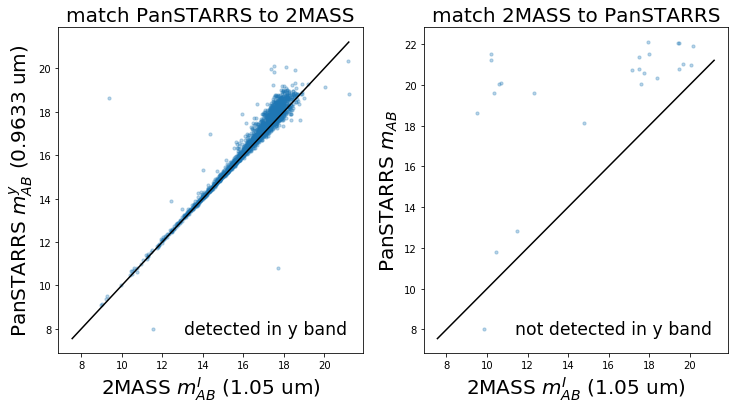

In [23]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
idx_y = np.arange(len(tmdf))[tmdf.ps_mag_band == 'y']
idx_d = np.arange(len(tmdf))[(tmdf.ps_mag_band != 'y') & (tmdf.ps_mag_band != 'non')]

ax[0].scatter(tmdf.mAB_I[idx_y],tmdf.ps_mag_use[idx_y],s=10,alpha=0.3,label='detected in y band')

ax[0].plot([min(tmdf.mAB_I),max(tmdf.mAB_I)],[min(tmdf.mAB_I),max(tmdf.mAB_I)],'k')
ax[0].set_title('match PanSTARRS to 2MASS',fontsize=20)
ax[0].set_xlabel(r'2MASS $m_{AB}^I$ (1.05 um)',fontsize=20)
ax[0].set_ylabel(r'PanSTARRS $m_{AB}^y$ (0.9633 um)',fontsize=20)
ax[0].legend(loc=0,frameon=False,fontsize='xx-large')

ax[1].scatter(tmdf.mAB_I[idx_d],tmdf.ps_mag_use[idx_d],s=10,alpha=0.3,label='not detected in y band')
ax[1].plot([min(df.tm_I),max(df.tm_I)],[min(df.tm_I),max(df.tm_I)],'k')
ax[1].set_title('match 2MASS to PanSTARRS',fontsize=20)
ax[1].set_xlabel(r'2MASS $m_{AB}^I$ (1.05 um)',fontsize=20)
ax[1].set_ylabel(r'PanSTARRS $m_{AB}$',fontsize=20)
ax[1].legend(loc=0,frameon=False,fontsize='xx-large')

plt.savefig('flag816_t2p.png',dpi=256,bbox_inches='tight')

# Repeat the same test including flag4

In [24]:
df = df_all[(df_all.flag8 == 1) | (df_all.flag16 == 1) | (df_all.flag4 == 1)].copy()

In [27]:
# load 2MASS data

tmdir='../../doc/20170617_Stacking/maps/catcoord/TM'+str(inst)+'/'
tmdfname = list(pd.read_csv(tmdir+'PSC/'+field+'_'+quad+'_2m.txt',header=0,sep='|'))
tmdf = pd.read_csv(tmdir+'PSC/'+field+'_'+quad+'_2m.txt',header=0,sep=',',names=tmdfname)

In [28]:
# select samples in CIBER targeting quad

tmdf = tmdf[(tmdf.x > -0.5) & (tmdf.x < 511.5) & (tmdf.y > -0.5) & (tmdf.y < 511.5)].copy()
df = df[(df.x > -0.5) & (df.x < 511.5) & (df.y > -0.5) & (df.y < 511.5)].copy()
df = df.reset_index(drop=True)
tmdf = tmdf.drop(['idx'],axis=1)
tmdf = tmdf.reset_index(drop=True)

## select the mag to be used in comparing with match mag

In [29]:
df['mag_use'] = df['yMeanPSFMag']
df['mag_band'] = ['y']*len(df)

idx=df.index[df['mag_use']==-999]
df.iloc[idx,np.where(np.array(list(df))=='mag_use')[0][0]] = df.iloc[idx]['zMeanPSFMag']
df.iloc[idx,np.where(np.array(list(df))=='mag_band')[0][0]] = 'z'

idx=df.index[df['mag_use']==-999]
df.iloc[idx,np.where(np.array(list(df))=='mag_use')[0][0]] = df.iloc[idx]['iMeanPSFMag']
df.iloc[idx,np.where(np.array(list(df))=='mag_band')[0][0]] = 'i'

idx=df.index[df['mag_use']==-999]
df.iloc[idx,np.where(np.array(list(df))=='mag_use')[0][0]] = df.iloc[idx]['rMeanPSFMag']
df.iloc[idx,np.where(np.array(list(df))=='mag_band')[0][0]] = 'r'

idx=df.index[df['mag_use']==-999]
df.iloc[idx,np.where(np.array(list(df))=='mag_use')[0][0]] = df.iloc[idx]['gMeanPSFMag']
df.iloc[idx,np.where(np.array(list(df))=='mag_band')[0][0]] = 'g'

idx=df.index[df['mag_use']==-999]
df.iloc[idx,np.where(np.array(list(df))=='mag_band')[0][0]] = 'non'

print('{} sources use y band.'.format(sum(df.mag_band=='y')))
print('{} sources use z band.'.format(sum(df.mag_band=='z')))
print('{} sources use i band.'.format(sum(df.mag_band=='i')))
print('{} sources use r band.'.format(sum(df.mag_band=='r')))
print('{} sources use g band.'.format(sum(df.mag_band=='g')))
print('{} sources has no mag in all bands.'.format(sum(df.mag_band=='non')))

16808 sources use y band.
14324 sources use z band.
25571 sources use i band.
10702 sources use r band.
12041 sources use g band.
7035 sources has no mag in all bands.


In [30]:
coordtm = SkyCoord(ra=tmdf['ra']*u.degree, dec=tmdf['dec']*u.degree, frame='icrs')
coordps = SkyCoord(ra=df['ra']*u.degree, dec=df['dec']*u.degree, frame='icrs')

# match PanSTARRS to 2MASS
idx_p2t, d2d_p2t,_ = match_coordinates_sky(coordps, coordtm)

# match 2MASS to PanSTARRS
idx_t2p, d2d_t2p,_ = match_coordinates_sky(coordtm, coordps)

df['tm_I'] = np.array(tmdf.iloc[idx_p2t].mAB_I)
df['dmatch_arcsec'] = d2d_p2t.arcsec

tmdf['ps_mag_use'] = np.array(df.iloc[idx_t2p].mag_use)
tmdf['ps_mag_band'] = np.array(df.iloc[idx_t2p].mag_band)
tmdf['dmatch_arcsec'] = d2d_t2p.arcsec

print('{} sources use y band.'.format(sum(tmdf.ps_mag_band=='y')))
print('{} sources use z band.'.format(sum(tmdf.ps_mag_band=='z')))
print('{} sources use i band.'.format(sum(tmdf.ps_mag_band=='i')))
print('{} sources use r band.'.format(sum(tmdf.ps_mag_band=='r')))
print('{} sources use g band.'.format(sum(tmdf.ps_mag_band=='g')))
print('{} sources has no mag in all bands.'.format(sum(tmdf.ps_mag_band=='non')))

2254 sources use y band.
5 sources use z band.
12 sources use i band.
3 sources use r band.
4 sources use g band.
2 sources has no mag in all bands.


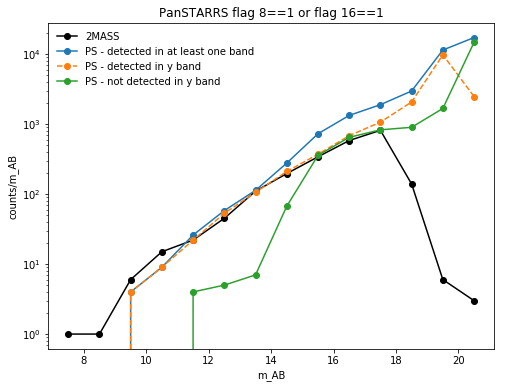

In [31]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

binedges = np.arange(7,22,1)
bins = (binedges[:-1] + binedges[1:])/2

tmhist,_ = np.histogram(tmdf['mAB_I'], bins = binedges)
ax.plot(bins,tmhist,'ko-',label='2MASS')

pshist,binedge = np.histogram(df['mag_use'], bins = binedges)
ax.plot(bins,pshist,'o-',label='PS - detected in at least one band')

pshist,binedge = np.histogram(df[df.mag_band == 'y']['mag_use'], bins = binedges)
ax.plot(bins,pshist,'o--',label='PS - detected in y band')

pshist,binedge = np.histogram(df[(df.mag_band != 'y') & (df.mag_band != 'non')]['mag_use'], bins = binedges)
ax.plot(bins,pshist,'o-',label='PS - not detected in y band')

ax.set_yscale('log')
ax.set_xlabel('m_AB')
ax.set_ylabel('counts/m_AB')
ax.set_title('PanSTARRS flag 8==1 or flag 16==1')
ax.legend(loc=0, frameon = False)
plt.savefig('flg4816_hist.png',dpi=256,bbox_inches='tight')